# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

#### Submitted by:
<ul>
    <li> Guy, Lawrence Adrian B. </li>
    <li>Surio, Rovil M. Jr.</li>
    <li>Sustento, Myke Alvin E.</li>
    <li>Vallarta, Troy Joaquin G.</li>
</ul>

# Part 1
Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

## Adding dataset
rlEstate_pd = pd.read_csv('datasets/real_estate_price_size_year.csv')

In [15]:
### YOUR CODE HERE
class MultipleLinearRegression:

  # def __init__(self,X=0,y=0):
  #   self.X = X
  #   self.y = y
  
  def correlations(self,X,y):
    self.R = []
    ## Finding the mean of X and y
    x_bar = X.mean()
    x1_bar = X.iloc[:,0].mean()
    x2_bar = X.iloc[:,1].mean()
    y_bar = y.mean()

    ## get the difference for each data point from their means
    sst_x1 = X.iloc[:,0]-x1_bar
    sst_x2 = X.iloc[:,1]-x2_bar
    sst_y = y-y_bar

    ## Finding the covariance of X and y
    cov_x1y = np.cov(X.iloc[:,0],y, bias=True)[0,1]
    cov_x2y = np.cov(X.iloc[:,1],y, bias=True)[0,1]

    ## Finding the standard deviation of X and y
    std_X1 = np.std(X.iloc[:,0])
    std_X2 = np.std(X.iloc[:,1])
    std_y = np.std(y)

    ## Finding the correlation
    self.R.append(round((cov_x2y /(std_X2*std_y)),2))
    self.R.append(round((cov_x1y /(std_X1*std_y)),2))
    return self.R

  def train(self, X,y):
    X_T = np.c_[np.ones(len(X_train)), X_train]    
    #error = np.linalg.norm(X_T.dot(theta) - y, ord=2)**2
    self.theta = np.linalg.pinv(X_T.T.dot(X_T)).dot(X_T.T).dot(y_train).reshape(3,1)
    self.model_ =(np.array([self.theta[-2],self.theta[-1],self.theta[0]]))

  def predict(self, x):
    self.y_hat = np.array(np.c_[np.ones((len(X_test), 1)), X_test])
    i = np.arange(0,5)
    self.preds = (np.dot(self.y_hat, self.theta)).round(2)
    return self.preds,i

  def evaluate(self):
    y = y_train.values[:,np.newaxis] 
    y_hat = np.arange(5*5).reshape(5,5)
    sst = np.sum(np.square(y)-(np.mean(y)))
    ssr = np.sum(np.square(self.y_hat)-(np.mean(y)))
    mse=np.mean(np.square(y_hat-y[0:5]))
    rsme = (np.sqrt(np.mean(np.sum(np.square(self.y_hat)))))
    r2 = (self.R**2)
    ar2 = (1-((1-r2)*(len(y)-1)/(len(y)-len(X)-1)))
    evaluate = {'SST': sst, 'SSR': ssr,'MSE': mse,'RSME': rsme,
        'R-squared': r2,'Adjusted R-squared': ar2                      
    }  
    df = pd.DataFrame(evaluate)
    return df

  def visualize(self,testX, testY):
    fig, ax = plt.subplots()
    regressor = plt.scatter(y_test, self.preds, color= 'green')
    plt.grid()
    ax.set_xlabel('True Values')
    ax.set_ylabel('Fitted Values')
    ax.set_title('True Value vs. Fitted Values');
    plt.savefig(f'Linear Regressor.jpg', dpi=400)
    return fig,ax, plt.show()
    

  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [16]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("datasets/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [17]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [18]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R


[0.09, 0.86]

Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [19]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL

regressor.train(X_train,y_train)
regressor.model_

array([[ 2.32557432e+02],
       [ 3.01009311e+03],
       [-5.96417427e+06]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [20]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

(array([[210962.87],
        [324367.18],
        [424013.31],
        [251928.01],
        [238092.95]]),
 array([0, 1, 2, 3, 4]))

Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [21]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

AttributeError: 'MultipleLinearRegression' object has no attribute 'R'

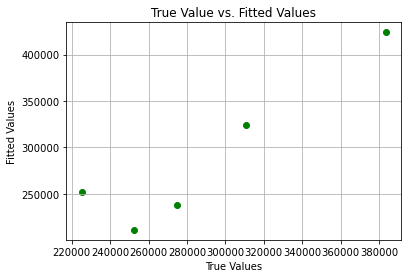

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'True Value vs. Fitted Values'}, xlabel='True Values', ylabel='Fitted Values'>,
 None)

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)

# Part 2
## 2.1 Lecture Requirement

Obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.



## 2.2 Lab Requirement

Perform data exploration, data cleaning, and data visualization. The dataset should contain targets either for regression or classification. Provide the correlation and measures of error and variability of the dataset.

# Part 3
## 3.1 Lecture Requirement

Identify an algorithm or method in performing a machine learning activity with the dataset you have chosen. Mention any papers, publications, or white papers about the properties, use, and theory behind the method. Provide an explanation of equations representing the algorithm.



## 3.2 Lab Requirement

Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.